In [23]:
import xarray
import xroms
from xhistogram.xarray import histogram
# from xrspatial.convolution import convolution_2d

import matplotlib.pyplot as plt
import numpy as np

from bichan_utils import *
from glob import glob

import warnings
warnings.filterwarnings('ignore')

In [10]:
cases = ['200m', '500m', '1km', '2km', '5km', '10km']
ncfiles = [rootdir + 'roms_his_' + case + '.nc' for case in cases]
ncfiles

['./reduced_channel_files/roms_his_200m.nc',
 './reduced_channel_files/roms_his_500m.nc',
 './reduced_channel_files/roms_his_1km.nc',
 './reduced_channel_files/roms_his_2km.nc',
 './reduced_channel_files/roms_his_5km.nc',
 './reduced_channel_files/roms_his_10km.nc']

In [24]:
def load_dataset(ncfile):
    ds = xarray.open_dataset(ncfile, chunks={'ocean_time': 1})
    ds, grid = xroms.roms_dataset(ds)
    ds = add_derivatives(ds, grid)
    # ds = ds.isel(s_rho=-1)
    return ds

dss = [load_dataset(ncfile) for ncfile in ncfiles]

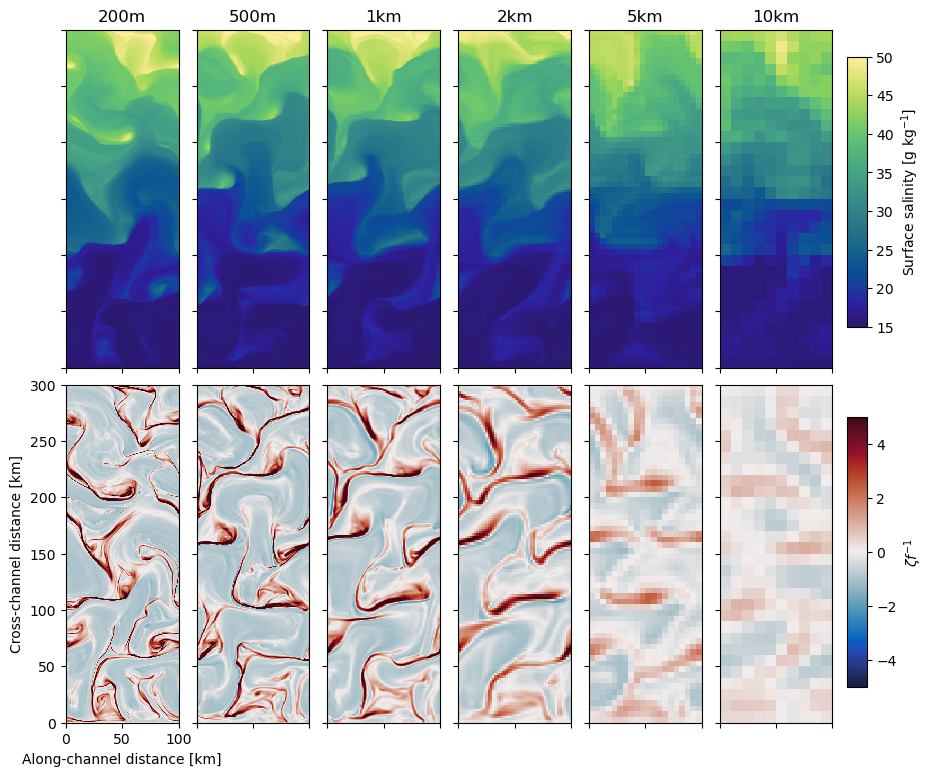

In [10]:
def plot_sss(ds, ax):
    if np.allclose(ds.pn, 0.005):
        tidx = 120+60
    else:
        tidx = 72+36
    pc = ax.pcolormesh(ds.x_psi.values/1e3, ds.y_psi.values/1e3, 
                   ds.salt.isel(ocean_time=tidx).values[1:-1, 1:-1], cmap=cmo.haline,
                   vmin=15, vmax=50)
    ax.set_aspect(1.0)
    return pc

    
def plot_zeta(ds, ax):
    if np.allclose(ds.pn, 0.005):
        tidx = 120+60
    else:
        tidx = 72+36
    pc = ax.pcolormesh(ds.x_psi.values/1e3, ds.y_psi.values/1e3, 
                   ds.zeta.isel(ocean_time=tidx).values[1:-1, 1:-1], cmap=cmo.balance,
                   vmin=-5, vmax=5)
    ax.set_aspect(1.0)
    return pc

fig, axs = plt.subplots(2, 6, figsize=(10, 9), gridspec_kw={'wspace': 0.08, 'hspace': 0.05})

for n in range(201):
    fig.clf()

    for col in range(6):
        pcs = plot_sss(dss[col], axs[0, col])
        pcz = plot_zeta(dss[col], axs[1, col])
        axs[0, col].set_title(cases[col])
        axs[0, col].set_xticklabels([])
        axs[1, col].set_xticklabels([])
        axs[0, col].set_yticklabels([])
        axs[1, col].set_yticklabels([])
        

    axcbs = fig.add_axes([0.91, 0.55, 0.02, 0.3])
    plt.colorbar(pcs, cax=axcbs).set_label(r'Surface salinity [g kg$^{-1}$]')

    axcbz = fig.add_axes([0.91, 0.15, 0.02, 0.3])
    plt.colorbar(pcz, cax=axcbz).set_label(r'$\zeta f^{-1}$')

    axs[1, 0].set_xlabel('Along-channel distance [km]')
    axs[1, 0].set_ylabel('Cross-channel distance [km]')
    axs[1, 0].set_xticklabels(np.arange(0, 400, 50))
    axs[1, 0].set_yticklabels(np.arange(0, 400, 50))

    plt.text(str(dss[2].ocean_time[n])

    fig.savefig('idealized_frame_{n:04d}.png', dpi=300)